A project done by : 

    * Rayhane Talbi

Import all libraries for NLP Processing and Analysis

In [133]:
import requests
from bs4 import BeautifulSoup
import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.util import ngrams
import numpy as np
import pandas as pd
from os import path
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from PIL import Image
%matplotlib inline

Web Scraping

In [135]:
#Specify the URL of the four Web pages 
pages = [requests.get('https://www.cartalk.com/content/2020-infiniti-qx50-essential-awd'),
         requests.get('https://www.cartalk.com/content/infiniti-qx30-sport-2017'),
         requests.get('https://www.cartalk.com/content/infiniti-qx-50-2016'),
         requests.get('https://www.cartalk.com/content/infiniti-qx-2016')]

In [136]:
#Loop through the 4 pages and create a Soup Object in order to extract all the useful information for analysis
pros_list = []
cons_list = []
for i in pages:
    soup = BeautifulSoup(i.text, 'html.parser')
    pros = soup.find(class_='list-group mt-3')
    cons = soup.find(class_='list-group mt-3 mb-3')
    pros_items = pros.find_all('li')
    for elm in pros_items: 
        pros_list.append(elm.get_text())
    cons_items = cons.find_all('li')
    for elm in cons_items: 
        cons_list.append(elm.get_text())

Text Preprocessing

In [137]:
#Load the list of english stopwords and the Lemmatizer corpus
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

In [138]:
#A function that does the preprocessing of a test
#Input must be str, output is an str (a list of lists)
def preprocess(text):
    text = text.lower()
    text = re.sub(r'\d+','',text)
    text = (re.compile('[^a-z ]')).sub('',text)
    text = text.strip()
    tokens = word_tokenize(text)
    result = [token for token in tokens if not token in stop_words]
    result = [lemmatizer.lemmatize(word) for word in result]
    return result

In [143]:
#Create a list of str lists that contain preprocessed pros paragraphs
clean_pros_list = []
for elm in pros_list:
    elm = preprocess(elm)
    clean_pros_list.append(elm)

In [144]:
#Create a list of str lists that contain preprocessed cons paragraphs
clean_cons_list = []
for elm in cons_list:
    elm = preprocess(elm)
    clean_cons_list.append(elm)

In [145]:
def final_clean_list(clean_list):
    final_list = []
    for sublist in clean_list:
        for item in sublist:
            final_list.append(item)
    return final_list

In [146]:
#Transform the pros list of lists into a simple list
final_pros_list = final_clean_list(clean_pros_list)

In [147]:
#A function that plots a 1-Gram Wordcloud
stopwords = set(STOPWORDS)
stopwords.update(["le", "lot", "added", "tire", "youll", "mode", "find", "play", "view", "apple","come","package", "inch", "side", "warning","car", "material", "spot", "qx", "ride", "even"])
def wordcloud(text,nom_image):
    wordcloud = WordCloud(max_font_size=500, max_words=20, background_color="white",stopwords=stopwords).generate(text)
    plt.imshow(wordcloud,interpolation='bilinear')
    plt.axis("off")
    plt.show()
    wordcloud.to_file(nom_image+'.png')

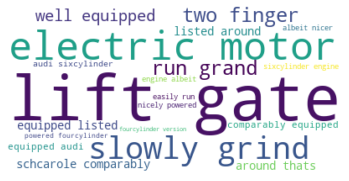

In [148]:
#Generate a 1-Gram Wordcloud for pros (+)
pros_text = " ".join(final_pros_list)
wordcloud(pros_text,"1Gram_pros")

In [149]:
#Transform the cons list of lists into a simple list
final_cons_list = final_clean_list(clean_cons_list)

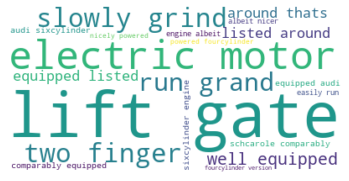

In [150]:
#Generate a 1-Gram Wordcloud for cons (-)
cons_text = " ".join(final_cons_list)
wordcloud(pros_text,"1Gram_cons")

In [151]:
#Calculate the frequencies of words and generate bigrams out of them
def bigram(text,nom_image):
    bigrams_list = list(nltk.bigrams(text.split()))
    dictionary = [' '.join(tup) for tup in bigrams_list]
    vectorizer = CountVectorizer(ngram_range=(2, 2))
    bag_of_words = vectorizer.fit_transform(dictionary)
    vectorizer.vocabulary_
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vectorizer.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    words_dict = dict(words_freq)
    wordcloud = WordCloud(stopwords=stopwords, max_words=20).generate_from_frequencies(words_dict)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()
    wordcloud.to_file(nom_image+'.png')

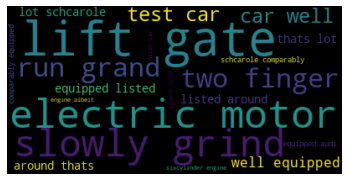

In [152]:
#Generate a 2-Gram Wordcloud for pros (+)
bigram(pros_text,"2Gram_pros")

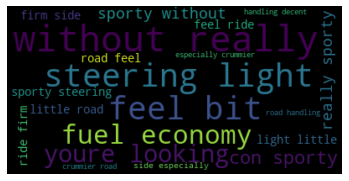

In [153]:
#Generate a 2-Gram Wordcloud for cons (-)
bigram(cons_text,"2Gram_cons")

In [154]:
#A function that plots a worlcloud into a shape of a car
def shape(text,nom_image):
    mask = np.array(Image.open('H:\Desktop\car.jpg'))
    wordcloud = WordCloud(mask=mask,max_font_size=500, max_words=20, background_color="white",stopwords=stopwords).generate(text)
    plt.imshow(wordcloud,interpolation='bilinear')
    plt.axis("off")
    plt.show()
    wordcloud.to_file(nom_image+'.png')

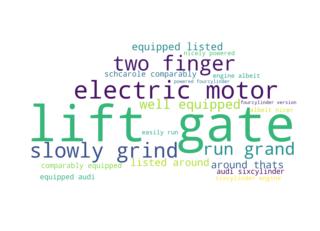

In [155]:
shape(pros_text,"carshape_wordcloud_pros")

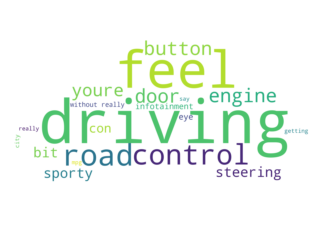

In [132]:
shape(cons_text,"carshape_wordcloud_cons")